# HW 6 Statistics and probability homework

Complete homework notebook in a homework directory with your name and zip up the homework directory and submit it to our class blackboard/elearn site.
Complete all the parts 6.1 to 6.5 for score of 3.  

Investigate plotting, linearegression, or complex matrix manipulation to get a score of 4 or cover two additional investigations for a score of 5. 

## 6.1 Coin flipping 


## 6.1.1
Write a function, flip_sum,  which generates $n$ random coin flips from a fair coin and then returns the number of heads. 

A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$

The output type should be a numpy integer, hint: use random.rand()


In [31]:
import random
import numpy as np

def flip_sum(n):
    total_heads = 0
    total_tails = 0
    for i in range(0,n):
        flip_face = np.random.randint(0, 2)

        if flip_face == 0:
            total_heads += 1
        elif flip_face == 1:
            total_tails += 1
          
    return total_heads, total_tails

print "Total number of heads, tails: " ,flip_sum(50)

Total number of heads, tails:  (23, 27)


## 6.1.2 Test it 
Check it by showing the results of 100 coins being flipped

In [32]:
print "Total number of heads, tails: " ,flip_sum(100)

Total number of heads, tails:  (49, 51)


## 6.1.3 Create and display a histogram of 200 experiments of flipping 5 coins.

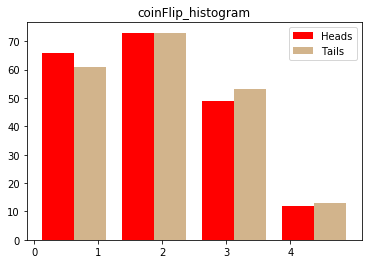

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

def coinFlip_histogram(n):
    count = 1
    H = []
    T = []
    while(count < n+1):
        total_heads = 0
        total_tails = 0
        
        head=[]
        tail=[]
        
        for i in range(0,5):
            flip_face = np.random.randint(0, 2)
            if flip_face == 0:
                total_heads += 1
            elif flip_face == 1:
                total_tails += 1
                
            head.append(total_heads)
            tail.append(total_tails)
        H.append(head[3])
        T.append(tail[3])
        count += 1
        
  
    bins = np.linspace(0, 5, 5)
    colors = ['red', 'tan']
    plt.title('coinFlip_histogram')
    plt.hist([H, T], bins, color = colors, label=['Heads', 'Tails'])
    plt.xticks(np.arange(5))
    plt.legend(loc = 1)
    plt.show()
    
coinFlip_histogram(200)

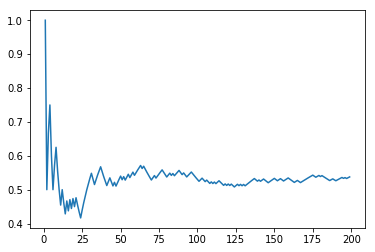

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def coinFlip(size):
    xmin, xmax, dx = 1, size, 1
    x = np.arange(xmin, xmax, dx)
    flips = np.random.randint(0, 2, size=size)
    return x, [flips[:i].mean() for i in x]

x, y = coinFlip(200)
plt.plot(x, y)

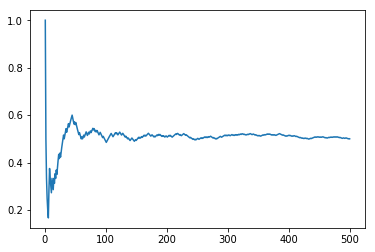

In [35]:
import numpy as np
from matplotlib import pyplot as plt

# To flip one coin with 0.5 probability of heads, 500 times
flips = np.random.binomial(1, 0.5, 500)
heads_so_far = flips.cumsum() * 1.0
heads_to_count = [heads_so_far[i-1]/i for i in range(1,len(flips)+1)]
x = range(1,len(flips)+1)
plt.plot(x,heads_to_count)
plt.show()

## 6.1.4
Write a function, estimate_prob, that uses flip_sum to estimate the following probability:

$P(  k_1 <= $ number of heads in $n$ flips $< k_2 ) $

The function should estimate the probability by running $m$ different trials of flip_sum(n), probably using a for loop.

In order to receive full credit estimate_prob call flip_sum (aka: flip_sum is located inside the estimate_prob function)

In [76]:
import numpy as np
from __future__ import division
import random

def flip_sum(x):
    heads = 0
    for i in range(0,x):
        flip_face = np.random.randint(0, 2)
        if flip_face ==0:
            heads = heads + 1
    return heads
    
def estimate_prob(n,k1,k2,m):
    probability=[]
    for j in range(0,m):
    
        total_heads = flip_sum(n)
        if (k1 <= total_heads and k2 > total_heads):
            probability.append(total_heads)
      


    estimated_probability = len(probability)/(m)
    #number of times total number of heads were in the range of k1 and k2 / total number of trials

    print "Estimated Probability is: ", estimated_probability
    
estimate_prob(100,20,55,1000)

Estimated Probability is:  0.812


In [77]:
# this is a small sanity check


x = estimate_prob(100,45,55,1000)
print x
assert 'float' in str(type(x))
print "does x==0.687?"

Estimated Probability is:  0.671
None


AssertionError: 

## 6.2.2  Calculate the actual probablities and compare it to your estimates for:
n= number of coins
k1 = min number of heads
k2 = upper limit of number of heads
m = the number of experiments
### 6.2.2.a n=100, k1 = 40, k2=60 m=100


In [78]:
x = estimate_prob(100,40,60,100)
print x
assert 'float' in str(type(x))
print "does x==0.99?"

Estimated Probability is:  0.94
None


AssertionError: 

### 6.2.2.b n=100, k1 = 40, k2=60 m=1000

In [79]:
x = estimate_prob(100,40,60,1000)
print x
assert 'float' in str(type(x))
print "does x==0.95?"

Estimated Probability is:  0.952
None


AssertionError: 

# 6.3 Conditional probablity

In a recent study, the following data were obtained in response to the question"
    "Do you favor the proposal of the school’s combining the elementary and middle school students in one building?"
    
Answers = [Yes, No, No opinion]
Males = [75, 89, 10]
Females = [105, 56, 6]

If a person is selected at random, find these probabilities solving using python.
1. The person has no opinion
2. The person is a male or is against the issue.
3. The person is a female, given that the person opposes the issue.

In [81]:
from __future__ import division


# Males - yes, no, no opinion, Total  
males = [75, 89, 10] 
males_yes = males[0]
males_no = males[1]
males_no_opinion = males[2]
total_males = sum(males)

# Females - yes, no, no opinion, Total  
females = [105, 56, 6]
females_yes = females[0]
females_no = females[1]
females_no_opinion = females[2]
total_females =sum(females)

# Total people - yes, no, no opinion
total_people= total_males + total_females
total_no_opinion = males_no_opinion + females_no_opinion
total_no = males_no + females_no

# Calculating Probability
prob_total_neutral = total_neutral / total_people
prob_male_or_oppose = (total_males + total_no - males_no)/total_people
prob_female_oppose = (females_no/total_no)
    
print "If a person is selected at random, probability that"    
print "\nA person has no opinion : ",prob_total_neutral 
print "\nThe person is a male or is against the issue : ",prob_male_or_oppose 
print "\nThe person is a female, given that the person opposes the issue: ",prob_female_oppose

If a person is selected at random, probability that

A person has no opinion :  0.0469208211144

The person is a male or is against the issue :  0.674486803519

The person is a female, given that the person opposes the issue:  0.386206896552


## 6.4 Matrix creation
Write a 12 by 12 times table matrix shown below.
Do this
6.4.1 using nested for loops
6.4.2 using numpy fromfunction array constructor
6.4.3 using numpy broadcasting

In [7]:
from numpy import array 
array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
   [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
   [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
   [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
   [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
   [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
   [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
   [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
   [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
   [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
   [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
   [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

**Using nested 'for' loop**

In [21]:
import numpy as np

ns = np.arange(1, 13)

In [22]:
n = len(ns)
m = np.empty((n, n), dtype='int')
for i, x in enumerate(ns):
    for j, y in enumerate(ns):
        m[i, j] = x*y
m

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

**Using numpy fromfunction array constructor**

In [23]:
np.fromfunction(lambda i, j: (i+1)*(j+1), shape=(12,12)).astype('int')

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

**Using numpy broadcasting**

The term broadcasting refers to the ability of NumPy to treat arrays of different shapes during arithmetic operations.

In [24]:
ns[:, None] * ns[None, :]

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

## 6.5 
Answer the following questions with respect to the
https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu
    
    
How many patients were censored?
What is the correlation coefficient between state and Suicide for deaths above 100 ?
What is the average deaths for each state and type of cause ?
What is the year that was the most deadly for each cause name ?

In [83]:
import pandas as pd
dfh = pd.read_csv("./data/NCHS_-_Leading_Causes_of_Death__United_States.csv")
dfh.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


**How many patients were censored?**

In [92]:
Total = dfh.groupby('State')['Deaths'].sum()
print Total

State
Alabama                  1510931
Alaska                    110361
Arizona                  1471757
Arkansas                  929634
California               7694563
Colorado                  973746
Connecticut               927612
Delaware                  238935
District of Columbia      160361
Florida                  5512136
Georgia                  2182235
Hawaii                    300668
Idaho                     351070
Illinois                 3299528
Indiana                  1821157
Iowa                      901497
Kansas                    785398
Kentucky                 1340426
Louisiana                1329242
Maine                     407962
Maryland                 1384915
Massachusetts            1712812
Michigan                 2839241
Minnesota                1212223
Mississippi               935091
Missouri                 1796910
Montana                   277255
Nebraska                  484109
Nevada                    609031
New Hampshire             332283
New 

**What is the correlation coefficient between state and Suicide for deaths above 100 ?**

In [100]:
# correlation_coefficienta number between −1 and +1 calculated so as to represent the linear dependence of 
# two variables or sets of data.

cc = dfh.loc[(dfh['Cause Name'] == 'Suicide') & (dfh['Deaths'] > 100),['State','Deaths']]
correlation_coefficient = cc.State.str.corrwith(cc.Deaths)
print (correlation_coefficient)

AttributeError: 'StringMethods' object has no attribute 'corrwith'

**What is the average deaths for each state and type of cause ?**

In [85]:
dfh.groupby('State')['Deaths'].mean()

State
Alabama                   7630.964646
Alaska                     557.378788
Arizona                   7433.116162
Arkansas                  4695.121212
California               38861.429293
Colorado                  4917.909091
Connecticut               4684.909091
Delaware                  1206.742424
District of Columbia       809.904040
Florida                  27839.070707
Georgia                  11021.388889
Hawaii                    1518.525253
Idaho                     1773.080808
Illinois                 16664.282828
Indiana                   9197.762626
Iowa                      4553.015152
Kansas                    3966.656566
Kentucky                  6769.828283
Louisiana                 6713.343434
Maine                     2060.414141
Maryland                  6994.520202
Massachusetts             8650.565657
Michigan                 14339.601010
Minnesota                 6122.338384
Mississippi               4722.681818
Missouri                  9075.303030
Montan

**What is the year that was the most deadly for each cause name ?**

In [86]:
dfh.groupby('Cause Name')['Deaths'].mean()

Cause Name
All causes                 95518.545940
Alzheimer's disease         2934.641026
CLRD                        5202.405983
Cancer                     21890.034188
Diabetes                    2812.775641
Heart disease              24733.297009
Influenza and pneumonia     2220.019231
Kidney disease              1726.452991
Stroke                      5513.119658
Suicide                     1388.553419
Unintentional injuries      4653.598291
Name: Deaths, dtype: float64

## 6.6 Plotting

### 6.6.1 Simple Plotting

**Plotting for equation y=mx+b**

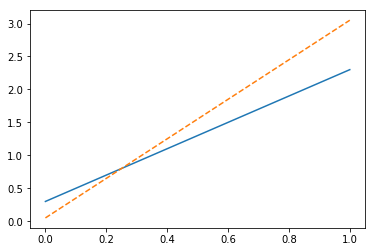

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def my_line(m, x0, y0, x):
    return m * (x - x0) + y0

x = np.linspace(0, 1, 50)

plt.plot(x, my_line(2, 0.1, 0.5, x), '-', x, my_line(3, 0.15, 0.5, x), '--')

plt.show()

### 6.6.2 Matplotlib Collections
Classes for the efficient drawing of large collections of objects that share most properties, e.g., a large number of line segments or polygons.



#### Matplotlib Collections using span where

**Syntax** 

static span_where(x, ymin, ymax, where, **kwargs)

Creates a BrokenBarHCollection to plot horizontal bars from over the regions in x where 'where' is True. The bars range on the y-axis from ymin to ymax

A BrokenBarHCollection is returned. kwargs are passed on to the collection.

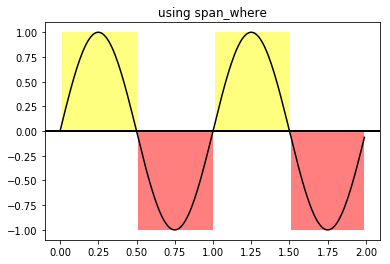

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0.0, 2, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = 1.2*np.sin(4*np.pi*t)


fig, ax = plt.subplots()
ax.set_title('using span_where')
ax.plot(t, s1, color='black')
ax.axhline(0, color='black', lw=2)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=1, where=s1 > 0, facecolor='yellow', alpha=0.5)
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-1, ymax=0, where=s1 < 0, facecolor='red', alpha=0.5)
ax.add_collection(collection)


plt.show()

#### Matplotlib Collections using PolyCollection

**Syntax** 

class matplotlib.collections.PolyCollection(verts, sizes=None, closed=True, **kwargs)


-  verts is a sequence of ( verts0, verts1, ...) where verts_i is a sequence of xy tuples of vertices, or an equivalent numpy array of shape (nv, 2).

-  sizes is None (default) or a sequence of floats that scale the corresponding verts_i. 

-  closed, when True, will explicitly close the polygon.

Valid Collection keyword arguments:
-  edgecolors: None
-  facecolors: None
-  linewidths: None
-  antialiaseds: None
-  offsets: None
-  transOffset: transforms.IdentityTransform()
-  norm: None (optional for matplotlib.cm.ScalarMappable)
-  cmap: None (optional for matplotlib.cm.ScalarMappable)
-  offsets and transOffset are used to translate the patch after rendering (default no offsets)

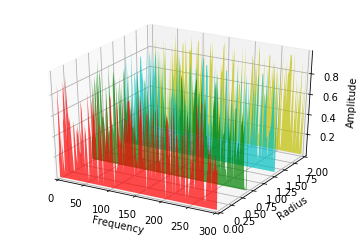

In [98]:
"""
Frequency vs Amplitude Distribution for multiple Radii in a single 3D plot.
The dimensions of the quantities are,
Frequency : 200 x 4, Amplitude : 200 x 4, Radius : 4"""

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import axes3d
import numpy as np

# These will be (200, 4), (200, 4), and (4)
freq_data = np.linspace(0,300,200)[:,None] * np.ones(4)[None,:]
amp_data = np.random.rand(200*4).reshape((200,4))
rad_data = np.linspace(0,2,4)

verts = []
for irad in range(len(rad_data)):
    # adding a zero amplitude at the beginning and the end to get a nice
    # flat bottom on the polygons
    xs = np.concatenate([[freq_data[0,irad]], freq_data[:,irad], [freq_data[-1,irad]]])
    ys = np.concatenate([[0],amp_data[:,irad],[0]])
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors = ['r', 'g', 'c', 'y'])
poly.set_alpha(0.7)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# The zdir keyword makes it plot the "z" vertex dimension (radius) along the y axis. 
# The zs keyword sets each polygon at the correct radius value.

ax.add_collection3d(poly, zs=rad_data, zdir='y')

ax.set_xlim3d(freq_data.min(), freq_data.max())
ax.set_xlabel('Frequency')
ax.set_ylim3d(rad_data.min(), rad_data.max())
ax.set_ylabel('Radius')
ax.set_zlim3d(amp_data.min(), amp_data.max())
ax.set_zlabel('Amplitude')

plt.show()

**References**

For plotting,

https://matplotlib.org/api/collections_api.html#module-matplotlib.collections

## 6.7 Linear regression

Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

**Simple Linear Regression**

Simple linear regression is an approach for predicting a response using a single feature.

Program to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

we define:
-  x as feature vector, i.e x = [x_1, x_2, …., x_n],
-  y as response vector, i.e y = [y_1, y_2, …., y_n]
-  for n observations (n=10).

**Regression Line** is the line which fits best in scatter plot so that we can predict the response for any new feature values. 

The equation of regression line is represented as:

 h(x_i) = b_0 + b_1 * x_i 

-  h(x_i) represents the predicted response value for ith observation.
-  b_0 and b_1 are regression coefficients and represent y-intercept and slope of regression line respectively.

	Estimated coefficients:


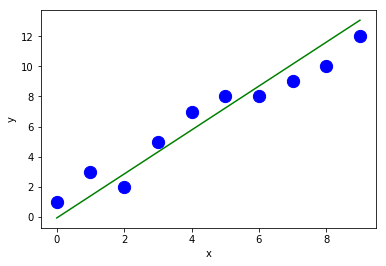

In [112]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x - n*m_y*m_x) 
    SS_xx = np.sum(x*x - n*m_x*m_x) 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "b", 
               marker = "o", s = 150) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    plt.show() 
  
def main(): 
    # data set 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("\tEstimated coefficients:".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

**Statsmodels.**

Statsmodels is “a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.” 

Program to demonstrate Linear regression in Statsmodels.

In [94]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

# print data.DESCR

import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

## Without a constant
import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          3.74e-256
Time:                        01:31:18   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**References**

For Linear regression

https://www.geeksforgeeks.org/linear-regression-python-implementation/

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

## 6.8 Complex Matrix Manipulations

**Matrix Manipulations**

In [121]:
# Python code to demonstrate matrix operations 
# add(), subtract() and divide() 
  
# importing numpy for matrix operations 
import numpy 
  
# initializing matrices 
x = numpy.array([[1, 2], [4, 5]]) 
y = numpy.array([[7, 8], [9, 10]]) 
  
# using add() to add matrices 
print ("Matrix addition : ") 
print (numpy.add(x,y)) 
  
# using subtract() to subtract matrices 
print ("\nMatrix substraction : ") 
print (numpy.subtract(x,y)) 
  
# using divide() to divide matrices 
print ("\nMatrix division : ") 
print (numpy.divide(x,y)) 

# using multiply() to multiply matrices element wise 
print ("\nMatrix multiplication : ") 
print (numpy.multiply(x,y)) 
  
# using dot() to multiply matrices 
print ("\nThe product of matrices is : ") 
print (numpy.dot(x,y)) 

# using sqrt() to print the square root of matrix 
print ("\nSquare root : ") 
print (numpy.sqrt(x)) 
  
# using sum() to print summation of all elements of matrix 
print ("\nThe summation of all matrix element is : ") 
print (numpy.sum(y)) 
  
# using sum(axis=0) to print summation of all columns of matrix 
print ("\nThe column wise summation of all matrix  is : ") 
print (numpy.sum(y,axis=0)) 
  
# using sum(axis=1) to print summation of all columns of matrix 
print ("\nThe row wise summation of all matrix  is : ") 
print (numpy.sum(y,axis=1)) 
  
# using "T" to transpose the matrix 
print ("\nThe transpose of given matrix is : ") 
print (x.T)

Matrix addition : 
[[ 8 10]
 [13 15]]

Matrix substraction : 
[[-6 -6]
 [-5 -5]]

Matrix division : 
[[0 0]
 [0 0]]

Matrix multiplication : 
[[ 7 16]
 [36 50]]

The product of matrices is : 
[[25 28]
 [73 82]]

Square root : 
[[1.         1.41421356]
 [2.         2.23606798]]

The summation of all matrix element is : 
34

The column wise summation of all matrix  is : 
[16 18]

The row wise summation of all matrix  is : 
[15 19]

The transpose of given matrix is : 
[[1 4]
 [2 5]]


**Program to multiply two matrices.**

In [30]:
def matmult(a,b):
    zip_b = zip(*b)
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
             for col_b in zip_b] for row_a in a]

x = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
y = [[1,2],[1,2],[3,4]]

import numpy as np 

mx = np.matrix(x)
my = np.matrix(y) 

In [31]:
matmult(x,y)

[[12, 18], [27, 42], [42, 66], [57, 90]]

**Program to multiply a matrix by another matrix of complex numbers and create a new matrix of complex numbers.**

In [99]:
import numpy as np

x = np.array([1+2j,3+4j])
print("First array:")
print(x)

y = np.array([5+6j,7+8j])
print("Second array:")
print(y)

# This function returns the dot product of the two vectors. 
# If the first argument is complex, then its conjugate is used for calculation.
z = np.vdot(x, y)
print("Product of above two arrays:")
print(z)

First array:
[1.+2.j 3.+4.j]
Second array:
[5.+6.j 7.+8.j]
Product of above two arrays:
(70-8j)


**References**
For Matrix manipulations,

https://www.geeksforgeeks.org/matrix-manipulation-python/
